# Week 2

12/17/2022

17:00-18:00

## Explore Python!

### Deep Neural Network

4와 9 분류하기: Classification

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw

Time ellapsed in training is: 4.067402601242065
[Test set] Average loss: 0.1005, Accuracy: 1899/1991 (95.38%)



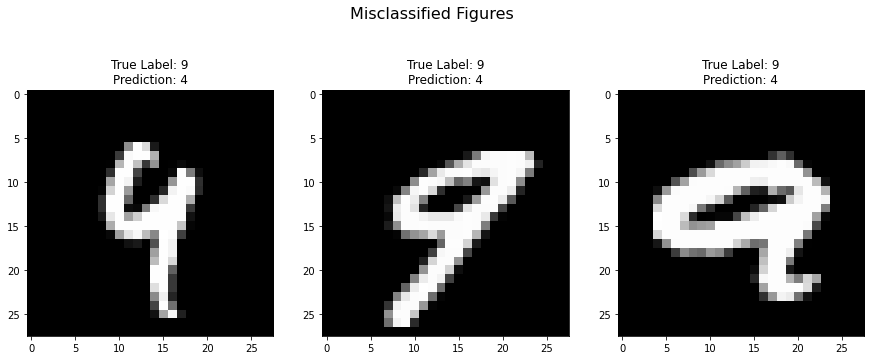

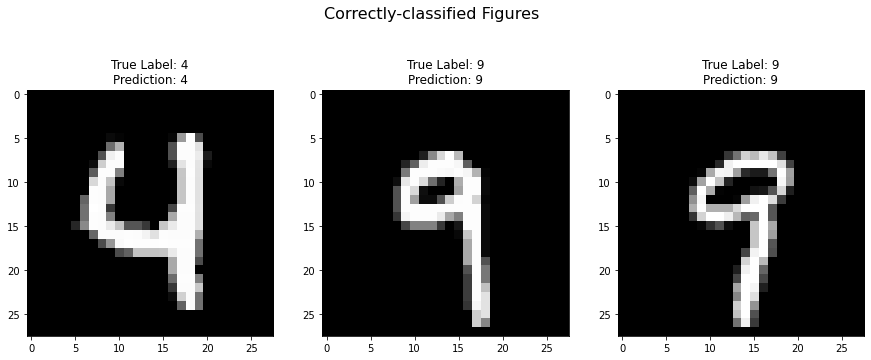

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from random import shuffle
'''
Step 1: (same step)
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1
    

'''
Step 2: (same step)
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: Create the model, specify loss function and optimizer. (LOOK HERE)
'''
model = LR()                                   # Define a Neural Network Model

def logistic_loss(output, target):
    return torch.mean(-torch.nn.functional.logsigmoid(target.reshape(-1)*output.reshape(-1)))

def sum_of_squares_loss(output, target):
    loss_4 = (torch.square(1 - torch.sigmoid(- output.reshape(-1))) + torch.square(torch.sigmoid(output.reshape(-1))))
    loss_9 = (torch.square(torch.sigmoid(- output.reshape(-1))) + torch.square(1 - torch.sigmoid(output.reshape(-1))))
    return  torch.mean(loss_4 * (1 - target.reshape(-1)) / 2 + loss_9 * (1 + target.reshape(-1)) / 2)

loss_function = sum_of_squares_loss                            # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=255*1e-4)   # specify SGD with learning rate



'''
Step 4: Train model with SGD (LOOK HERE)
'''
train_loader = DataLoader(dataset=train_set, batch_size=64, shuffle=True)

import time
start = time.time()
# Train the model (for 3 epochs)
for epoch in range(3) :
    for images, labels in train_loader :
        # Clear previously computed gradient
        optimizer.zero_grad()

        # then compute gradient with forward and backward passes
        train_loss = loss_function(model(images), labels.float())
        train_loss.backward()

        # perform SGD step (parameter update)
        optimizer.step()
end = time.time()
print(f"Time ellapsed in training is: {end - start}")


'''
Step 5: (same step)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)
# no need to shuffle test data

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 : 
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))

'''
Step 6: (same step)
''' 
# Misclassified images
shuffle(misclassified_ind)
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_2))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_1))
    plt.imshow(image, cmap='gray')
plt.show()

# Correctly classified images
shuffle(correct_ind)
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_1))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_2))
    plt.imshow(image, cmap='gray')
plt.show()

## Electrodynamics Simulation

`pycharge` library를 이용한 시뮬레이션

<img src="https://pycharge.readthedocs.io/en/latest/figs/oscillating_charge.gif" width=300/>

<ipython-input-4-a746b7d4a7ea>:31: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e9, vmax=1e9)


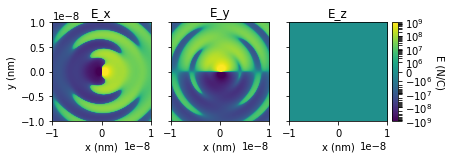

<ipython-input-4-a746b7d4a7ea>:80: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = SymLogNorm(linthresh=1.01e-3, linscale=1, vmin=-1, vmax=1)


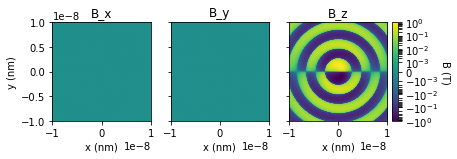

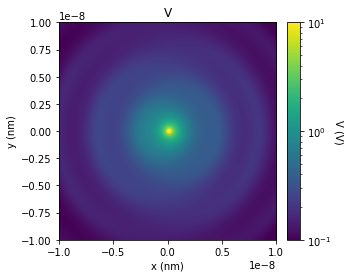

<ipython-input-4-a746b7d4a7ea>:149: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = SymLogNorm(linthresh=1.01e-12, linscale=1,


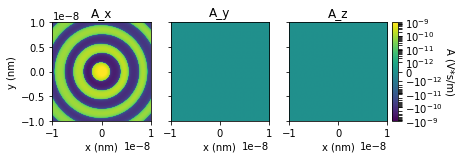

In [ ]:
# !pip install pycharge

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm, SymLogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import pycharge as pc

# %% Calculate and plot E field
# Create charge and simulation objects
charge = pc.OscillatingCharge(origin=(0, 0, 0), direction=(1, 0, 0),
                              amplitude=1e-10, omega=5e17)
simulation = pc.Simulation(charge)

# Create meshgrid in x-y plane between -10 nm to 10 nm at z=0
lim = 10e-9
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing='ij')  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)

# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]

# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm = SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e9, vmax=1e9)
extent = [-lim, lim, -lim, lim]
im_0 = axs[0].imshow(E_x_plane.T, origin='lower', norm=norm, extent=extent)
im_1 = axs[1].imshow(E_y_plane.T, origin='lower', norm=norm, extent=extent)
im_2 = axs[2].imshow(E_z_plane.T, origin='lower', norm=norm, extent=extent)

# Add labels
for ax in axs:
    ax.set_xlabel('x (nm)')
axs[0].set_ylabel('y (nm)')
axs[0].set_title('E_x')
axs[1].set_title('E_y')
axs[2].set_title('E_z')

# Add colorbar to figure
Ecax = inset_axes(axs[2],
                  width="6%",  # width = 5% of parent_bbox width
                  height="100%",  # height : 50%
                  loc='lower left',
                  bbox_to_anchor=(1.05, 0., 1, 1),
                  bbox_transform=axs[2].transAxes,
                  borderpad=0,
                  )
E_cbar = plt.colorbar(im_2, cax=Ecax)  # right of im_2
E_cbar.ax.set_ylabel('E (N/C)', rotation=270, labelpad=12)

plt.show()
# %% Calculate and plot B field
# Create charge and simulation objects
charge = pc.OscillatingCharge(origin=(0, 0, 0), direction=(1, 0, 0),
                              amplitude=1e-10, omega=5e17)
simulation = pc.Simulation(charge)

# Create meshgrid in x-y plane between -10 nm to 10 nm at z=0
lim = 10e-9
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing='ij')  # z=0

# Calculate B field components at t=0
B_x, B_y, B_z = simulation.calculate_B(t=0, x=x, y=y, z=z)

# Plot E_x, E_y, and E_z fields
B_x_plane = B_x[:, :, 0]  # Create 2D array at z=0 for plotting
B_y_plane = B_y[:, :, 0]
B_z_plane = B_z[:, :, 0]

# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm = SymLogNorm(linthresh=1.01e-3, linscale=1, vmin=-1, vmax=1)
extent = [-lim, lim, -lim, lim]
im_0 = axs[0].imshow(B_x_plane.T, origin='lower', norm=norm, extent=extent)
im_1 = axs[1].imshow(B_y_plane.T, origin='lower', norm=norm, extent=extent)
im_2 = axs[2].imshow(B_z_plane.T, origin='lower', norm=norm, extent=extent)

# Add labels
for ax in axs:
    ax.set_xlabel('x (nm)')
axs[0].set_ylabel('y (nm)')
axs[0].set_title('B_x')
axs[1].set_title('B_y')
axs[2].set_title('B_z')

# Add colorbar to figure
Ecax = inset_axes(axs[2],
                  width="6%",  # width = 5% of parent_bbox width
                  height="100%",  # height : 50%
                  loc='lower left',
                  bbox_to_anchor=(1.05, 0., 1, 1),
                  bbox_transform=axs[2].transAxes,
                  borderpad=0,
                  )
E_cbar = plt.colorbar(im_2, cax=Ecax)  # right of im_2
E_cbar.ax.set_ylabel('B (T)', rotation=270, labelpad=12)

plt.show()
# %% Calculate and plot scalar and vector potentials
# Create charge and simulation objects
charge = pc.OscillatingCharge(origin=(0, 0, 0), direction=(1, 0, 0),
                              amplitude=1e-10, omega=5e17)
simulation = pc.Simulation(charge)

# Create meshgrid in x-y plane between -10 nm to 10 nm at z=0
lim = 10e-9
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing='ij')  # z=0

# Calculate potentials at t=0
V = simulation.calculate_V(t=0, x=x, y=y, z=z)
A_x, A_y, A_z = simulation.calculate_A(t=0, x=x, y=y, z=z)

# Plot scalar potential
V_plane = V[:, :, 0]  # Create 2D array at z=0 for plotting
fig, ax = plt.subplots()
norm = LogNorm(vmin=1e-1, vmax=1e1)
extent = [-lim, lim, -lim, lim]
im_V = ax.imshow(V_plane.T, origin='lower', norm=norm, extent=extent)
ax.set_xlabel('x (nm)')
ax.set_ylabel('y (nm)')
ax.set_title('V')
Ecax = inset_axes(ax,
                  width="6%",  # width = 5% of parent_bbox width
                  height="100%",  # height : 50%
                  loc='lower left',
                  bbox_to_anchor=(1.05, 0., 1, 1),
                  bbox_transform=ax.transAxes,
                  borderpad=0,
                  )
E_cbar = plt.colorbar(im_V, cax=Ecax)  # right of im_V
E_cbar.ax.set_ylabel('V (V)', rotation=270, labelpad=12)
plt.show()

# Plot vector potential
A_x_plane = A_x[:, :, 0]
A_y_plane = A_y[:, :, 0]
A_z_plane = A_z[:, :, 0]
fig, axs = plt.subplots(1, 3, sharey=True)
norm = SymLogNorm(linthresh=1.01e-12, linscale=1,
                  vmin=-1e-9, vmax=1e-9)
extent = [-lim, lim, -lim, lim]
im_Ax = axs[0].imshow(A_x_plane.T, origin='lower', norm=norm, extent=extent)
im_Ay = axs[1].imshow(A_y_plane.T, origin='lower', norm=norm, extent=extent)
im_Az = axs[2].imshow(A_z_plane.T, origin='lower', norm=norm, extent=extent)
for ax in axs:
    ax.set_xlabel('x (nm)')
axs[0].set_ylabel('y (nm)')
axs[0].set_title('A_x')
axs[1].set_title('A_y')
axs[2].set_title('A_z')
Ecax = inset_axes(axs[2],
                  width="6%",  # width = 5% of parent_bbox width
                  height="100%",  # height : 50%
                  loc='lower left',
                  bbox_to_anchor=(1.05, 0., 1, 1),
                  bbox_transform=axs[2].transAxes,
                  borderpad=0,
                  )
E_cbar = plt.colorbar(im_Az, cax=Ecax)  # right of im_Az
E_cbar.ax.set_ylabel('A (V*s/m)', rotation=270, labelpad=12)
plt.show()

If you want more libraries.. then go [here](https://youtu.be/-29x_deQQus)

## Arduino

My recent projects:

- [두밧두 와리와리](https://youtu.be/A8rITsw-wBY)

- [그린 쓰레기통](https://www.instagram.com/p/Ckybr_QhESh/?utm_source=ig_web_copy_link)

### LED 제어하기 Part 1

먼저 교과서 p56을 펼쳐 봅시다.

### LED 제어하기 Part 2

[Create a LED Dimmer](https://docs.arduino.cc/built-in-examples/communication/Dimmer)

<img src="https://docs.arduino.cc/static/079b1bab3758603a56c5d98e1f59a88e/a6d36/circuit.png" width=700/>

```{arduino}
const int ledPin = 9;      // the pin that the LED is attached to

void setup() {
  // initialize the serial communication:
  Serial.begin(9600);
  // initialize the ledPin as an output:
  pinMode(ledPin, OUTPUT);
}

void loop() {
  byte brightness;
  // check if data has been sent from the computer:
  if (Serial.available()) {
    // read the most recent byte (which will be from 0 to 255):
    brightness = Serial.read();
    // set the brightness of the LED:
    analogWrite(ledPin, brightness);
  }
}
```

## Github

[앞으로 사용할 사이트](https://codewithguma.github.io)

ID: codewithguma@gmail.com

PW: Welovecoding!1

## Instagram

ID: cod.guma

PW: welovecoding